In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file using Pandas
df = pd.read_csv('policy_distances.csv')


In [2]:
df = df.drop('Unnamed: 0', axis=1)

df.columns = ["Source", "Target", "Cosine", "Jaccard"]

df = df[~df["Source"].isin(['vlhuas ', 'inholland', 'Aeres', 'tinbergen', 'marnix', 'hku', 'codarts','ZUYD', 'Wittenborg', 'Windesheim', 'Webster', 'Viaa', ' tio '])]
df = df[~df["Target"].isin(['vlhuas ', 'inholland', 'Aeres', 'tinbergen', 'marnix', 'hku', 'codarts','ZUYD', 'Wittenborg', 'Windesheim', 'Webster', 'Viaa', ' tio '])]

df = df.sort_values(['Source',"Cosine"], ascending=False)

In [3]:
unis = list(df.Source.unique())

In [4]:
unis

['avans',
 'artez',
 'amsterdamuas',
 'The Hague',
 'TU Delft',
 'Saxion',
 'NHL Stendedn',
 'Fontys',
 'BUAS ',
 'AUAS ',
 'AHK ',
 ' rug ',
 ' rotterdam uas ',
 ' international HU ',
 ' hogeschool Leiden ',
 ' WUR ',
 ' Vrije Universiteit Amsterdam ',
 ' University of Twente ',
 ' Universiteit Utrecht ',
 ' UVH ',
 ' Tilburg University ',
 ' TU Eindhoven ',
 ' TIAS ',
 ' Royal academy of art The Hague',
 ' Royal Conservatoire The Hague',
 ' Open University ',
 ' Maastricht University ',
 ' Leiden University ',
 ' Hotelschool The Hague',
 ' HZ ',
 ' HAS',
 ' HAN ',
 ' EUR ',
 ' Design academy Eindhoven ',
 ' Amsterdam University College']

In [5]:
table = df[df['Source'].isin(unis)].groupby('Source').head(3)

In [6]:
table[["Source", "Target", "Cosine"]]\
    .rename(columns={"Cosine":"Distance"})\
    .to_csv("cosine_similarity_policies.csv", index=False)

In [7]:
table = pd.read_csv('cosine_similarity_policies.csv')

# Create an empty graph
G = nx.Graph()

# Iterate over the rows of the DataFrame and add edges to the graph
for index, row in table.iterrows():
    source = row['Source']
    target = row['Target']
    weight = row['Distance']
    G.add_edge(source, target, weight=weight)

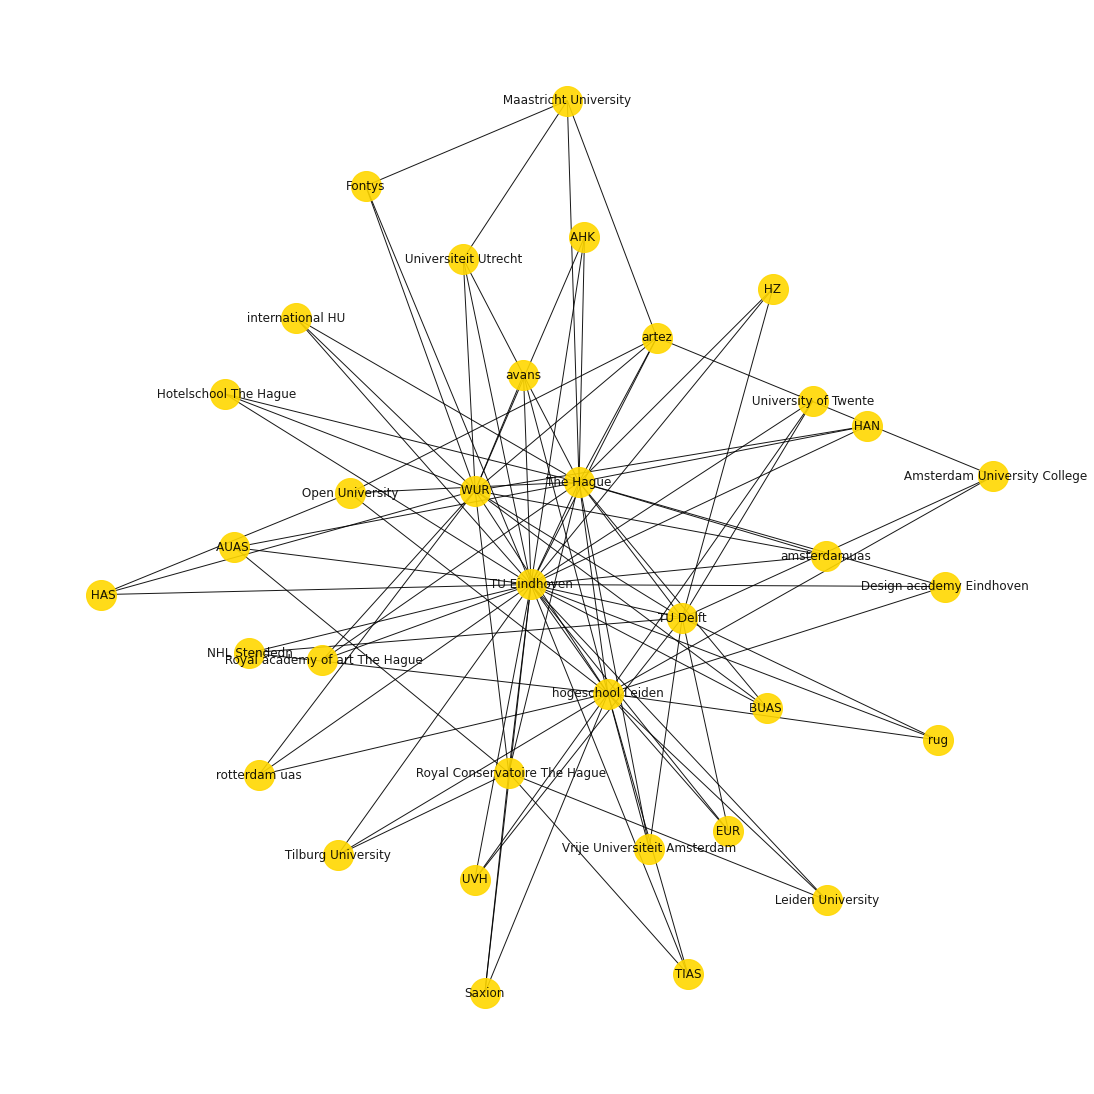

In [8]:
# show the plot with increased size, bigger nodes, and reduced edge opacity
pos = nx.spring_layout(G, dim=2, iterations=10, weight='weight', scale=2)
node_colors = ["gold"]

plt.figure(figsize=(15, 15))
nx.draw(G, pos, node_color=node_colors, with_labels=True, alpha=0.9, node_size=900)
plt.show()
